In [1]:
from bs4 import BeautifulSoup
import re

file_path = 'AUVSI SUAS Rankings - Google Drive.html'
with open(file_path) as file:
  html_doc = file.read()
soup = BeautifulSoup(html_doc, 'html.parser')

In [ ]:
soup.body.find(id='sheets-viewport').find_all('tbody')

In [3]:
years = [link.contents[0] for link in soup.body.find(id='top-bar').find_all('a')]
years.pop(-1)

'2003'

In [4]:
import pandas as pd
import numpy as np

tables = pd.read_html('AUVSI SUAS Rankings - Google Drive.html', header=1)
for i in range(len(tables)):
  tables[i] = tables[i].drop(['1', 'Overall Rank'], axis=1, errors='ignore')
  tables[i]['Overall Rank'] = [i + 1 for i in range(len(tables[i]))]
  tables[i]["Year"] = [2021 - i for j in range(len(tables[i].index))]
tables.pop(-1)

,Unnamed: 1,Overall Rank,Year


In [42]:
from functools import reduce

overall_ranks = [
  pd.DataFrame({2021 - i: list(tables[i]['Overall Rank'])}, index=tables[i]['University'])
  for i in range(len(tables))
]
overall_rank_by_years = overall_ranks[0]
for overall_rank in overall_ranks[1:]:
  overall_rank_by_years = overall_rank_by_years.merge(overall_rank, how='outer', on='University')
overall_rank_by_years = reduce(lambda df, df1: df.merge(df1, how='outer', on='University'), overall_ranks[1:], overall_ranks[0])

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
University,,,,,,,,,,,,,,,,,,
Amador Valley High School,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Arab Academy for Science, Technology and Maritime Transport",2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bronx High School of Science,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"California State Polytechnic University, Pomona",4.0,5.0,28.0,18.0,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Christopher Newport University,5.0,6.0,47.0,30.0,21.0,13.0,13.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


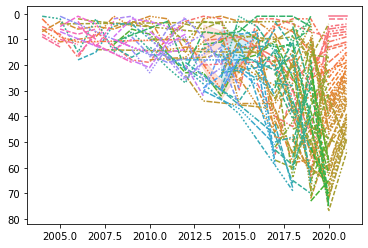

In [44]:
import seaborn as sns

line = sns.lineplot(data=overall_rank_by_years.T, legend=False)
line.invert_yaxis()

In [37]:
print("|".join(["(overall_rank_by_years[{}]<=10)".format(2021 - i) for i in range(len(tables))]))

(overall_rank_by_years[2021]<=10)|(overall_rank_by_years[2020]<=10)|(overall_rank_by_years[2019]<=10)|(overall_rank_by_years[2018]<=10)|(overall_rank_by_years[2017]<=10)|(overall_rank_by_years[2016]<=10)|(overall_rank_by_years[2015]<=10)|(overall_rank_by_years[2014]<=10)|(overall_rank_by_years[2013]<=10)|(overall_rank_by_years[2012]<=10)|(overall_rank_by_years[2011]<=10)|(overall_rank_by_years[2010]<=10)|(overall_rank_by_years[2009]<=10)|(overall_rank_by_years[2008]<=10)|(overall_rank_by_years[2007]<=10)|(overall_rank_by_years[2006]<=10)|(overall_rank_by_years[2005]<=10)|(overall_rank_by_years[2004]<=10)


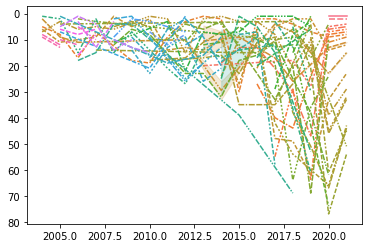

In [45]:
top_10 = overall_rank_by_years[
  (overall_rank_by_years[2021]<=10)|(overall_rank_by_years[2020]<=10)|(overall_rank_by_years[2019]<=10)|(overall_rank_by_years[2018]<=10)|(overall_rank_by_years[2017]<=10)|(overall_rank_by_years[2016]<=10)|(overall_rank_by_years[2015]<=10)|(overall_rank_by_years[2014]<=10)|(overall_rank_by_years[2013]<=10)|(overall_rank_by_years[2012]<=10)|(overall_rank_by_years[2011]<=10)|(overall_rank_by_years[2010]<=10)|(overall_rank_by_years[2009]<=10)|(overall_rank_by_years[2008]<=10)|(overall_rank_by_years[2007]<=10)|(overall_rank_by_years[2006]<=10)|(overall_rank_by_years[2005]<=10)|(overall_rank_by_years[2004]<=10)
]
line = sns.lineplot(data=top_10.T, legend=False)
line.invert_yaxis()

In [9]:
tables_with_year = pd.concat([table for table in tables])
tables_with_year.head()

,University,Team,Overall Rank,Year,Mission Rank,FRR Rank,Journal Rank,Awards
0,Amador Valley High School,AmadorUAVs,1,2021,NaN,NaN,NaN,NaN
1,"Arab Academy for Science, Technology and Marit...",Dragobots,2,2021,NaN,NaN,NaN,NaN
2,Bronx High School of Science,Skunkworks,3,2021,NaN,NaN,NaN,NaN
3,"California State Polytechnic University, Pomona",CPP AUVSI-SUAS,4,2021,NaN,NaN,NaN,NaN
4,Christopher Newport University,CNU UAS,5,2021,NaN,NaN,NaN,NaN


In [17]:
import plotly.express as px
fig1 = px.line(tables_with_year, x="Year", y="Overall Rank", color='University',  markers=True, color_discrete_sequence=px.colors.qualitative.Light24)
fig1.update_yaxes(range=[10, 0], tick0=1, dtick=1)
fig1.show()

In [18]:
fig2 = px.line(tables_with_year, x="Year", y="Mission Rank", color='University',  markers=True, color_discrete_sequence=px.colors.qualitative.Light24)
fig2.update_yaxes(range=[10, 0], tick0=1, dtick=1)
fig2.show()

In [19]:
fig3 = px.line(tables_with_year, x="Year", y="FRR Rank", color='University',  markers=True, color_discrete_sequence=px.colors.qualitative.Light24)
fig3.update_yaxes(range=[10, 0], tick0=1, dtick=1)
fig3.show()

In [20]:
fig4 = px.line(tables_with_year, x="Year", y="Journal Rank", color='University',  markers=True, color_discrete_sequence=px.colors.qualitative.Light24)
fig4.update_yaxes(range=[10, 0], tick0=1, dtick=1)
fig4.show()

In [28]:
import plotly.io as pio
pio.write_html(fig1, file="index_overall_rank.html")
pio.write_html(fig2, file="index_mission_rank.html")
pio.write_html(fig3, file="index_FPR_rank.html")
pio.write_html(fig4, file="index_journal_rank.html")

In [49]:
with open('index.html', 'w') as file:
    file.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    file.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    file.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))
    file.write(fig4.to_html(full_html=False, include_plotlyjs='cdn'))

In [15]:
import plotly.express as px

fig = px.colors.qualitative.swatches()
fig.show()